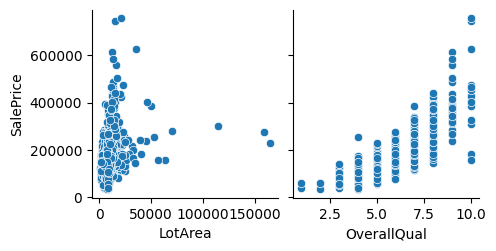

<ipython-input-4-590b0606fa32>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


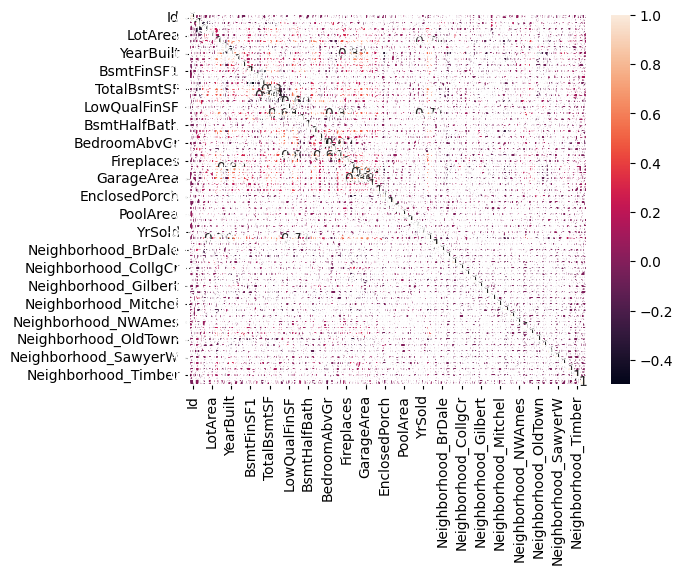

x_train lenght:  769
y_train lenght:  769
Linear Regression - MSE: 1433777904.0006733, R2: 0.7750427175913178, RMSE: 37865.25985650532
Random Forest - MSE: 1219012261.7308803, R2: 0.8087390767728617, RMSE: 34914.35609789876


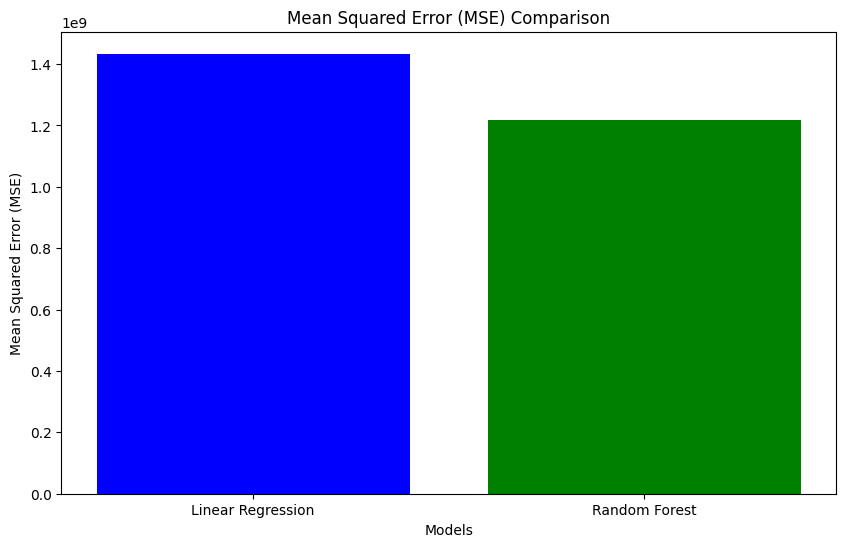

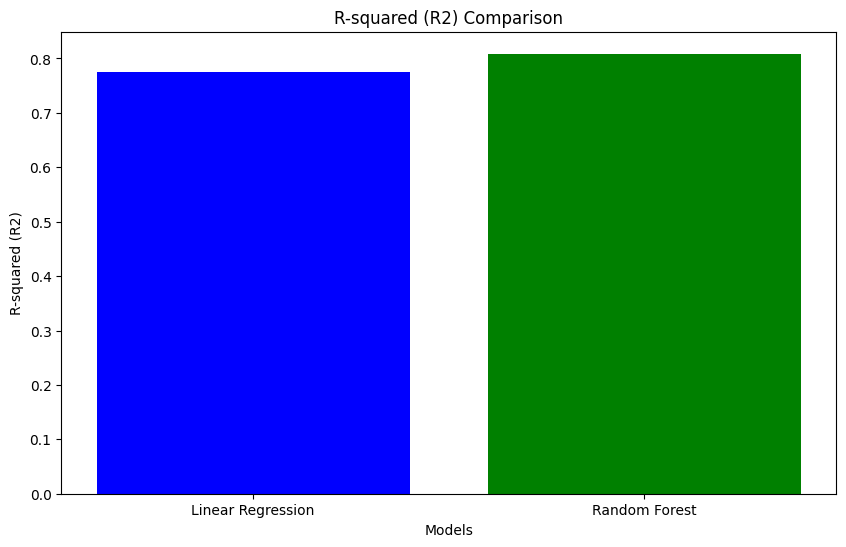

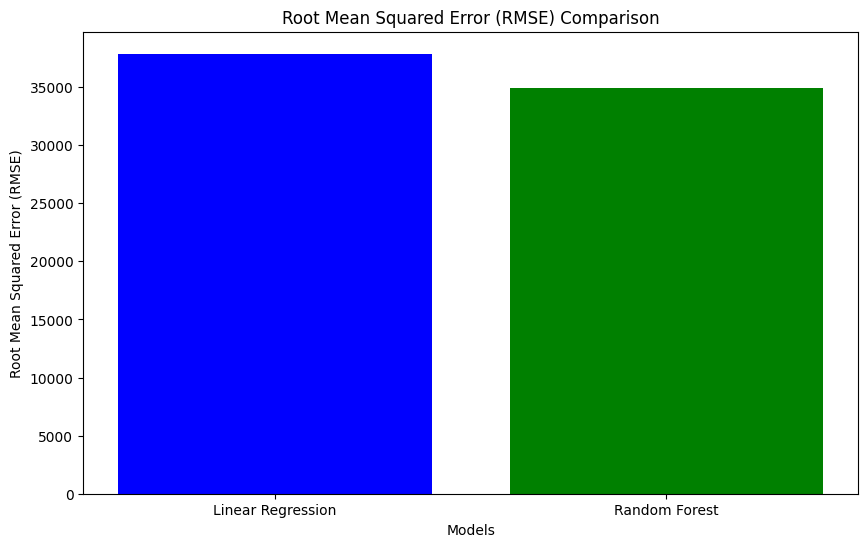

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from math import sqrt

# Step 1: Data Understanding and Cleaning
train_data = pd.read_csv('Housing-project-train-data.csv')
test_data = pd.read_csv('Hosuing-project-test-data.csv')

# Data Preprocessing (Encoding, Scaling)
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(), inplace=True)
train_data = pd.get_dummies(train_data, columns=['Neighborhood'], drop_first=True)

# Step 2: Exploratory Data Analysis (EDA)
sns.pairplot(train_data, x_vars=['LotArea', 'OverallQual'], y_vars=['SalePrice'], kind='scatter')
plt.show()

correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Feature Engineering
train_data['TotalSF'] = train_data['1stFlrSF'] + train_data['2ndFlrSF']

# Feature Selection (you can add more features here)
features = ['LotArea', 'OverallQual', 'TotalSF']

# Step 3: Model Building and Evaluation

# Split data into training and testing sets
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify columns with string values
string_columns = X_train.select_dtypes(include=['object']).columns
string_columns = X_test.select_dtypes(include=['object']).columns

# Drop columns with string values
X_train = X_train.drop(columns=string_columns)
X_test = X_test.drop(columns=string_columns)

# Get the indices of the dropped rows
dropped_indices = X_train.index.difference(X_train.dropna().index)
dropped_indices_test = X_test.index.difference(X_test.dropna().index)

# Drop rows with missing values
X_train = X_train.dropna()
X_test = X_test.dropna()

# Remove corresponding entries in y_train
y_train = y_train.drop(dropped_indices)
y_test = y_test.drop(dropped_indices_test)

X_train = X_train.dropna()
X_test = X_test.dropna()


print("x_train lenght: ",len(X_train))
print("y_train lenght: ",len(y_train))



# Train different models
model_lr = LinearRegression()
model_rf = RandomForestRegressor()

model_lr.fit(X_train,y_train)

model_rf.fit(X_train,y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = sqrt(mse_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)

print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}, RMSE: {rmse_lr}')


# Data
models = ['Linear Regression', 'Random Forest']
mse_values = [mse_lr, mse_rf]
r2_values = [r2_lr, r2_rf]
rmse_values = [rmse_lr, rmse_rf]

# Plotting MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) Comparison')
plt.show()

# Plotting R2
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('R-squared (R2) Comparison')
plt.show()

# Plotting RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.show()
